# **Clustering Practical**

Generated data shape: (300, 2)


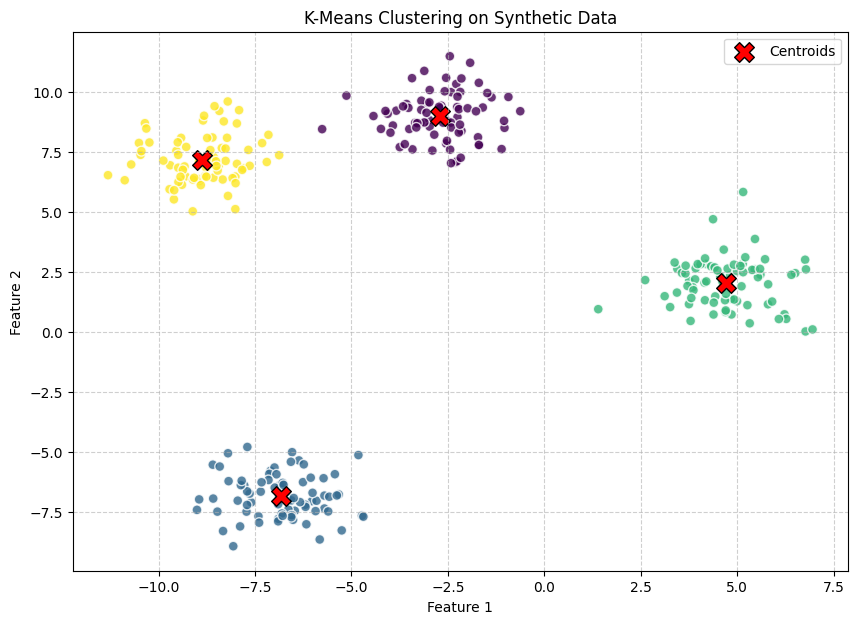

In [1]:
''' Q21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
scatter plot '''

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Generate synthetic data with 4 centers
n_samples = 300
n_features = 2
n_centers = 4
random_state = 42 # for reproducibility

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, random_state=random_state)

print(f"Generated data shape: {X.shape}")

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init=10) # n_init to run k-means multiple times and pick the best result
kmeans.fit(X)
y_pred = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# 3. Visualize using a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.8, edgecolors='w')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', edgecolors='k')
plt.title('K-Means Clustering on Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [2]:
'''Q22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels '''

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data # Features
y = iris.target # True labels (for reference, not used in unsupervised clustering)

print(f"Iris dataset shape: {X.shape}")

# 2. Apply Agglomerative Clustering with 3 clusters
# n_clusters=3 (because we know Iris has 3 species)
# linkage='ward' is a common choice, especially for compact, spherical clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

# 3. Predict the cluster labels
predicted_labels = agg_clustering.fit_predict(X)

# 4. Display the first 10 predicted labels
print("\nFirst 10 predicted cluster labels:")
print(predicted_labels[:10])

Iris dataset shape: (150, 4)

First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]


Generated make_moons data shape: (300, 2)
Estimated number of clusters: 7
Estimated number of noise points: 13


/tmp/ipython-input-3733946182.py:54: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size,


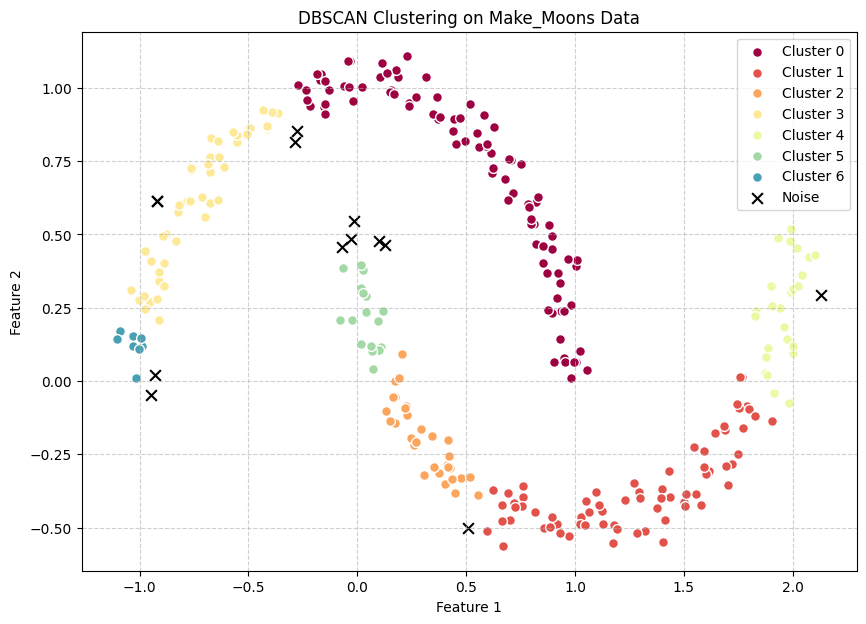

In [3]:
'''Q23.  Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot '''

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate synthetic 'make_moons' data
n_samples = 300
random_state = 42
X, y = make_moons(n_samples=n_samples, noise=0.05, random_state=random_state)

print(f"Generated make_moons data shape: {X.shape}")

# 2. Apply DBSCAN clustering
# Parameters for make_moons data often need tuning.
# eps: maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: the number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
dbsc = DBSCAN(eps=0.1, min_samples=5)
dbsc.fit(X)

# Get cluster labels. Noise points are labeled as -1.
labels = dbsc.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# 3. Visualize using a scatter plot, highlighting outliers
plt.figure(figsize=(10, 7))

# Unique labels for plotting
unique_labels = set(labels)

# Colormap for clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1: # Noise points
        # Black used for noise.
        col = 'k'
        marker = 'x'
        size = 60
    else:
        marker = 'o'
        size = 50

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size,
                edgecolors='w', label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering on Make_Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [4]:
'''Q24.  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster '''

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target # True labels (for reference)

print(f"Wine dataset shape: {X_wine.shape}")

# 2. Standardize the features
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

print("Features standardized.")

# 3. Apply K-Means clustering (assuming 3 clusters, as per the dataset's nature)
n_clusters_wine = 3
kmeans_wine = KMeans(n_clusters=n_clusters_wine, random_state=42, n_init=10)
kmeans_wine.fit(X_wine_scaled)
labels_wine = kmeans_wine.predict(X_wine_scaled)

# 4. Print the size of each cluster
print("\nCluster sizes:")
for i in range(n_clusters_wine):
    cluster_size = np.sum(labels_wine == i)
    print(f"Cluster {i}: {cluster_size} samples")

Wine dataset shape: (178, 13)
Features standardized.

Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


Generated make_circles data shape: (300, 2)
Estimated number of clusters: 2
Estimated number of noise points: 0


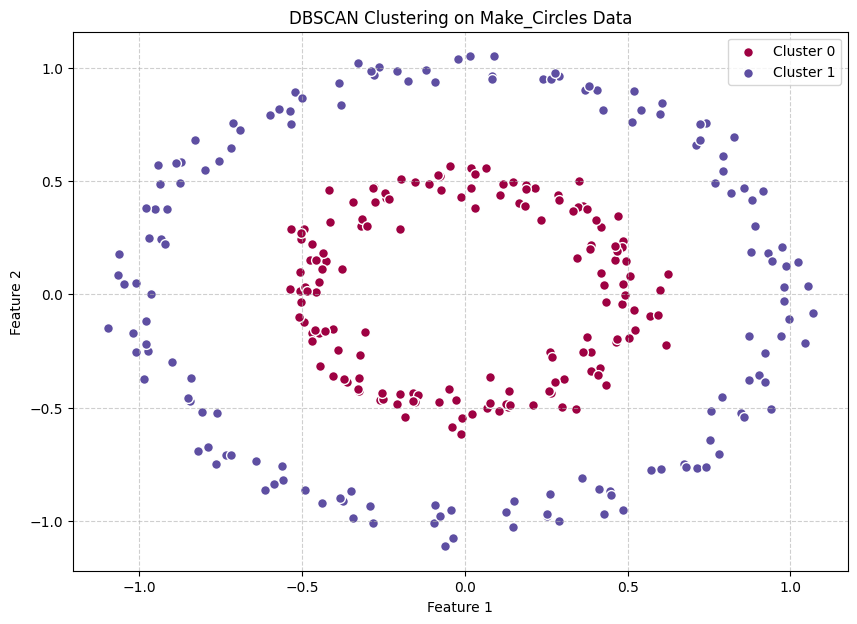

In [5]:
'''Q25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result '''

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate synthetic 'make_circles' data
n_samples = 300
random_state = 42
X, y = make_circles(n_samples=n_samples, noise=0.05, factor=0.5, random_state=random_state)

print(f"Generated make_circles data shape: {X.shape}")

# 2. Apply DBSCAN clustering
# Parameters for make_circles often need tuning.
# eps: maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: the number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
dbsc = DBSCAN(eps=0.2, min_samples=5) # Adjusted parameters for circles data
dbsc.fit(X)

# Get cluster labels. Noise points are labeled as -1.
labels = dbsc.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# 3. Visualize using a scatter plot, highlighting outliers
plt.figure(figsize=(10, 7))

# Unique labels for plotting
unique_labels = set(labels)

# Colormap for clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1: # Noise points
        # Black used for noise.
        col = 'k'
        marker = 'x'
        size = 60
    else:
        marker = 'o'
        size = 50

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size,
                edgecolors='w', label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering on Make_Circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [6]:
'''Q26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids '''

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X_bc = data.data  # Features
y_bc = data.target # True labels (for reference)

print(f"Breast Cancer dataset shape: {X_bc.shape}")

# 2. Apply MinMaxScaler to standardize features
scaler_bc = MinMaxScaler()
X_bc_scaled = scaler_bc.fit_transform(X_bc)

print("Features scaled using MinMaxScaler.")

# 3. Apply K-Means clustering with 2 clusters
n_clusters_bc = 2 # Assuming 2 clusters (benign/malignant)
kmeans_bc = KMeans(n_clusters=n_clusters_bc, random_state=42, n_init=10)
kmeans_bc.fit(X_bc_scaled)
labels_bc = kmeans_bc.predict(X_bc_scaled)

# 4. Output the cluster centroids
print("\nCluster Centroids (after scaling):")
print(kmeans_bc.cluster_centers_)

Breast Cancer dataset shape: (569, 30)
Features scaled using MinMaxScaler.

Cluster Centroids (after scaling):
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


Generated data shape: (300, 2)
Estimated number of clusters: 3
Estimated number of noise points: 22


/tmp/ipython-input-4067788919.py:58: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size,


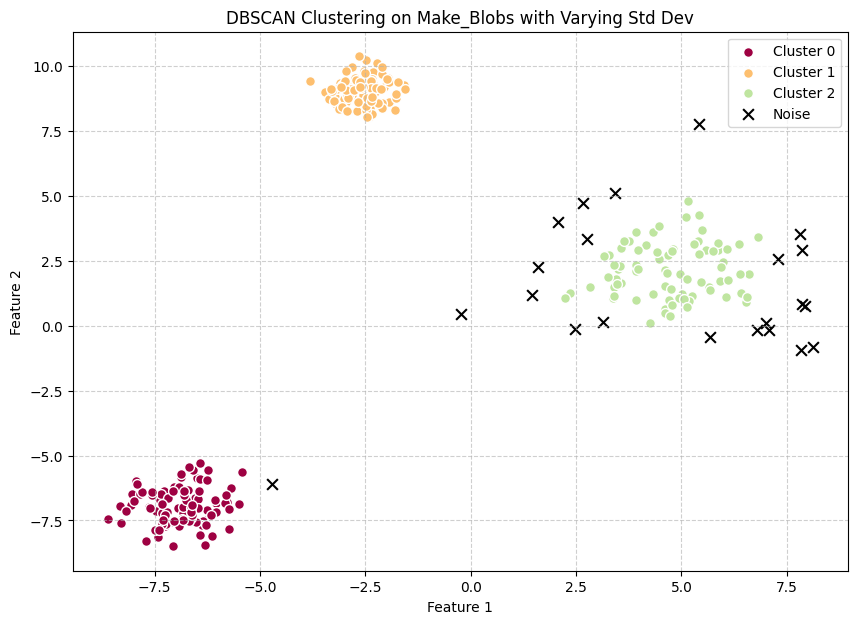

In [7]:
'''Q27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN '''

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate synthetic data with 3 centers and varying standard deviations
n_samples = 300
n_features = 2
n_centers = 3
random_state = 42
cluster_std = [0.5, 1.5, 0.7] # Different standard deviations for each cluster

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, cluster_std=cluster_std, random_state=random_state)

print(f"Generated data shape: {X.shape}")

# 2. Apply DBSCAN clustering
# For data with varying densities, tuning eps and min_samples is crucial.
# A single eps might struggle to identify all clusters effectively.
dbsc = DBSCAN(eps=0.8, min_samples=5) # Parameters might need adjustment for optimal results
dbsc.fit(X)

# Get cluster labels. Noise points are labeled as -1.
labels = dbsc.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

# 3. Visualize using a scatter plot, highlighting outliers
plt.figure(figsize=(10, 7))

# Unique labels for plotting
unique_labels = set(labels)

# Colormap for clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1: # Noise points
        # Black used for noise.
        col = 'k'
        marker = 'x'
        size = 60
    else:
        marker = 'o'
        size = 50

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size,
                edgecolors='w', label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering on Make_Blobs with Varying Std Dev')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Original Digits dataset shape: (1797, 64)
Digits dataset shape after PCA: (1797, 2)


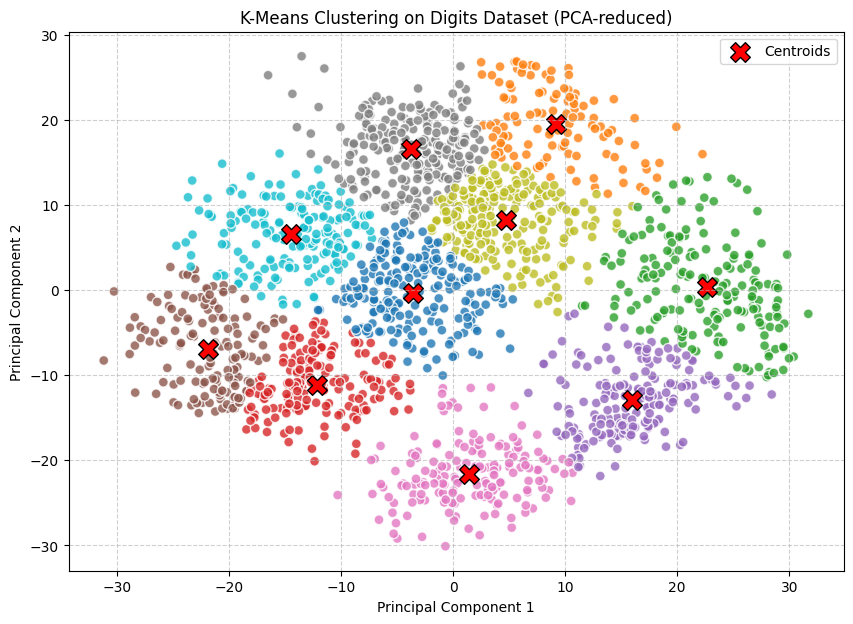

In [8]:
'''Q28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means '''

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Load the Digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target # True labels (for reference, 0-9)

print(f"Original Digits dataset shape: {X_digits.shape}")

# 2. Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_digits)

print(f"Digits dataset shape after PCA: {X_pca.shape}")

# 3. Apply K-Means clustering (assuming 10 clusters for digits 0-9)
n_clusters_digits = 10
kmeans_digits = KMeans(n_clusters=n_clusters_digits, random_state=42, n_init=10)
kmeans_digits.fit(X_pca)
labels_digits = kmeans_digits.predict(X_pca)
centroids_digits = kmeans_digits.cluster_centers_

# 4. Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_digits, cmap='tab10', s=50, alpha=0.8, edgecolors='w')
plt.scatter(centroids_digits[:, 0], centroids_digits[:, 1], c='red', marker='X', s=200, label='Centroids', edgecolors='k')
plt.title('K-Means Clustering on Digits Dataset (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [9]:
'''Q29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart '''

from sklearn.datasets import make_blobs

# Generate a synthetic dataset with distinct clusters
X, _ = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)

print(f"Generated data shape: {X.shape}")

Generated data shape: (300, 2)


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. Initialize an empty list to store Silhouette Scores
silhouette_scores = []
k_values = range(2, 6) # k from 2 to 5 inclusive

# 3. Loop through values of k from 2 to 5
for k in k_values:
    # 4a. Initialize a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # 4b. Fit the KMeans model to the synthetic dataset X
    kmeans.fit(X)

    # 4c. Predict the cluster labels for X
    labels = kmeans.predict(X)

    # 4d. Calculate the Silhouette Score
    score = silhouette_score(X, labels)

    # 4e. Append the calculated Silhouette Score to the list
    silhouette_scores.append(score)

# 5. Print the silhouette_scores list, along with the corresponding k values
print("Silhouette Scores for different k values:")
for i, score in enumerate(silhouette_scores):
    print(f"k={k_values[i]}: {score:.4f}")

Silhouette Scores for different k values:
k=2: 0.5902
k=3: 0.7569
k=4: 0.7916
k=5: 0.6890


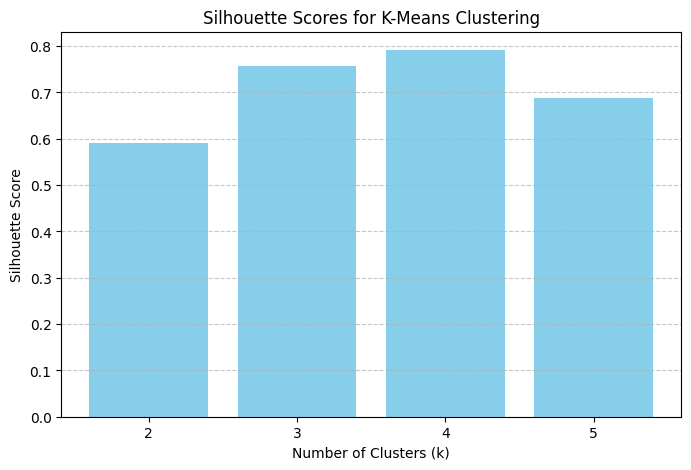

In [11]:
import matplotlib.pyplot as plt

# 1. Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(list(k_values), silhouette_scores, color='skyblue')

# 2. Label the x-axis and y-axis
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# 3. Add a title to the plot
plt.title('Silhouette Scores for K-Means Clustering')

# 4. Set x-axis ticks to show integer k values
plt.xticks(list(k_values))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Display the plot
plt.show()

In [12]:
'''30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage '''

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target # True labels

print(f"Iris dataset shape (X): {X.shape}")
print(f"Iris dataset target shape (y): {y.shape}")

Iris dataset shape (X): (150, 4)
Iris dataset target shape (y): (150,)


In [13]:
from scipy.cluster.hierarchy import linkage

# Perform hierarchical clustering using 'average' linkage
linked = linkage(X, method='average')

print("Hierarchical clustering performed. The linkage matrix 'linked' has been created.")

Hierarchical clustering performed. The linkage matrix 'linked' has been created.


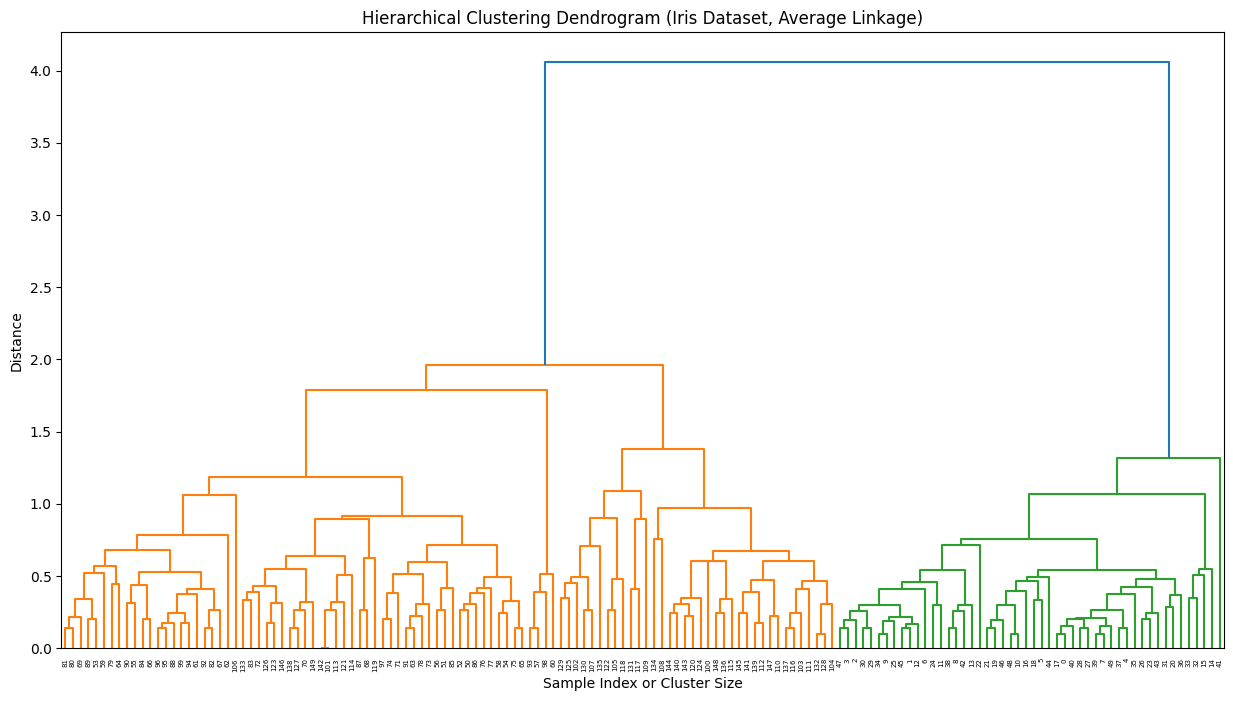

In [14]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# 2. Create a figure and axes for the plot
plt.figure(figsize=(15, 8))

# 3. Generate the dendrogram
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

# 4. Add a title to the dendrogram plot
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset, Average Linkage)')

# 5. Add labels to the x-axis and y-axis
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')

# 6. Display the plot
plt.show()

In [15]:
'''Q31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries '''

from sklearn.datasets import make_blobs

# Generate a synthetic dataset with features and a specified number of centers, adjusting `cluster_std` to create overlapping clusters
X, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=1.5, random_state=42)

# Print the shape of the generated dataset to verify its dimensions
print(f"Generated data shape: {X.shape}")

Generated data shape: (300, 2)


In [16]:
from sklearn.cluster import KMeans

# 2. Initialize a KMeans model with 4 clusters, a fixed random state, and n_init=10
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# 3. Fit the KMeans model to the synthetic dataset X
kmeans.fit(X)

# 4. Predict the cluster labels for the data points in X
labels = kmeans.predict(X)

# 5. Extract the cluster centers (centroids)
centroids = kmeans.cluster_centers_

print("K-Means clustering applied successfully.")
print(f"First 5 predicted labels: {labels[:5]}")
print(f"Cluster centroids:\n{centroids}")

K-Means clustering applied successfully.
First 5 predicted labels: [3 3 0 1 3]
Cluster centroids:
[[-2.76847921  8.96113041]
 [-6.80871448 -6.80563143]
 [ 4.75736792  2.07611029]
 [-8.8911944   7.10011368]]


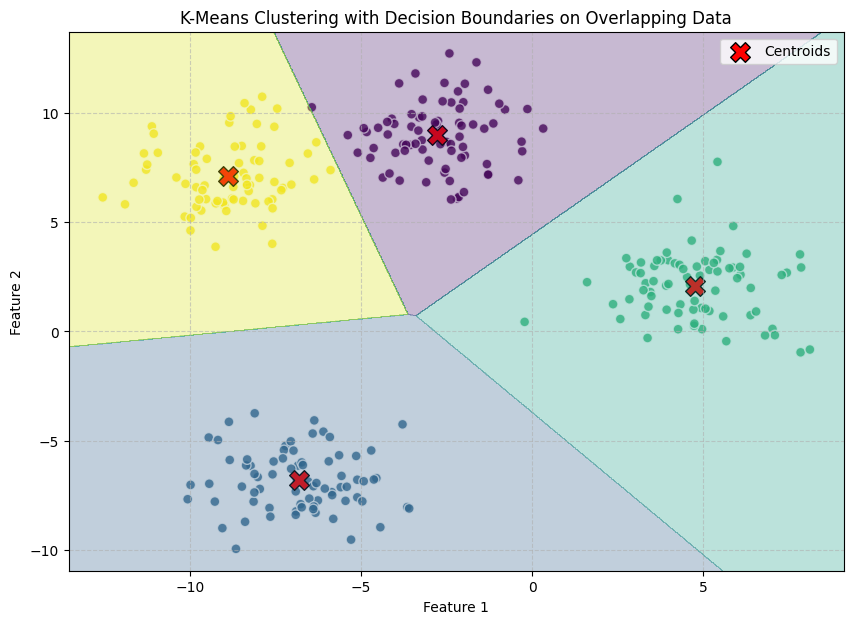

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
plt.figure(figsize=(10, 7))

# 1. Create a scatter plot of the synthetic data X, colored by labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w')

# 2. Overlay the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', edgecolors='k')

# 3. Create a meshgrid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # Step size of the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 4. Predict cluster labels for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

# 6. Add title and labels
plt.title('K-Means Clustering with Decision Boundaries on Overlapping Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 7. Display the plot
plt.show()

In [18]:
'''Q32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results '''

from sklearn.datasets import load_digits

# 1. Load the Digits dataset
digits = load_digits()

# 2. Extract the feature data (images)
X = digits.data

# 3. Extract the target labels (actual digits)
y = digits.target

# 4. Print the shape of X and y to verify the loaded data dimensions
print(f"Digits dataset features shape (X): {X.shape}")
print(f"Digits dataset target shape (y): {y.shape}")

Digits dataset features shape (X): (1797, 64)
Digits dataset target shape (y): (1797,)


In [19]:
from sklearn.manifold import TSNE

# 1. Initialize a TSNE object with n_components=2 and random_state=42
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')

# 2. Apply t-SNE to the X (Digits dataset features) using the .fit_transform() method
X_tsne = tsne.fit_transform(X)

# 3. Print the shape of X_tsne to verify the dimensionality reduction
print(f"Shape of X after t-SNE dimensionality reduction: {X_tsne.shape}")

Shape of X after t-SNE dimensionality reduction: (1797, 2)


In [20]:
from sklearn.cluster import DBSCAN

# 1. Initialize a DBSCAN object with specified parameters
dbscan = DBSCAN(eps=3, min_samples=5)

# 2. Fit the DBSCAN model to the t-SNE reduced data and predict cluster labels
dbscan_labels = dbscan.fit_predict(X_tsne)

# 3. Print the first few predicted labels and the number of unique clusters found
print(f"First 10 DBSCAN predicted labels: {dbscan_labels[:10]}")
print(f"Number of unique clusters found (including noise -1): {len(set(dbscan_labels))}")

First 10 DBSCAN predicted labels: [0 1 2 3 4 5 6 7 1 5]
Number of unique clusters found (including noise -1): 16


/tmp/ipython-input-3289213272.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_tsne[noise_mask, 0], X_tsne[noise_mask, 1],


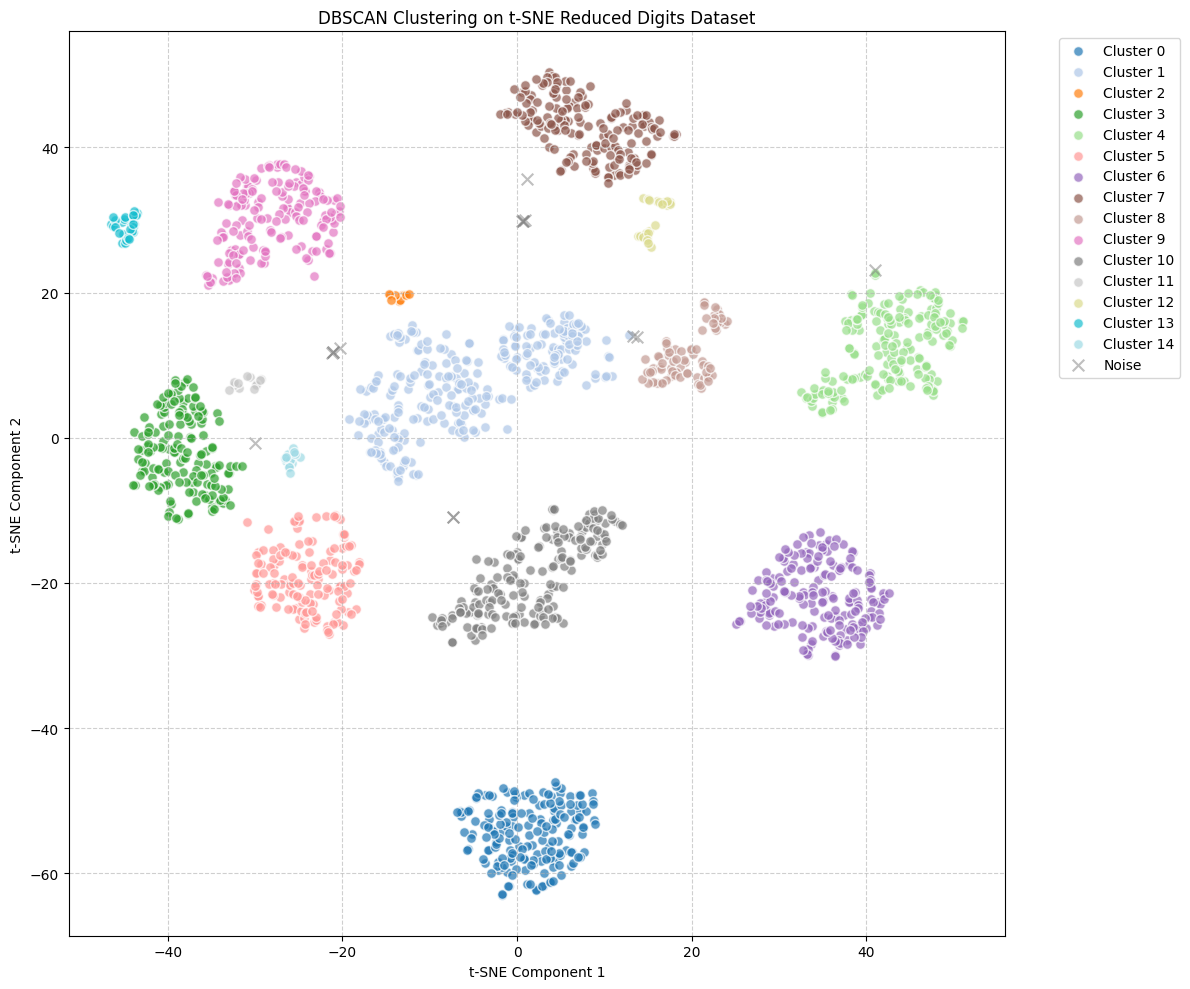

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get the unique labels, excluding noise (-1)
unique_labels = set(dbscan_labels)
if -1 in unique_labels:
    unique_labels.remove(-1)

# Number of clusters (excluding noise)
n_clusters = len(unique_labels)

# Create a color map for the clusters
# Use 'tab20' for distinct colors, up to 20 clusters. If more, cycle or choose another colormap.
colors = plt.cm.tab20(np.linspace(0, 1, n_clusters)) if n_clusters <= 20 else plt.cm.get_cmap('hsv', n_clusters)(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(12, 10))

# Plot regular clusters
for i, label in enumerate(unique_labels):
    mask = (dbscan_labels == label)
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                color=colors[i], label=f'Cluster {label}',
                s=50, alpha=0.7, edgecolors='w')

# Plot noise points
noise_mask = (dbscan_labels == -1)
if np.any(noise_mask):
    plt.scatter(X_tsne[noise_mask, 0], X_tsne[noise_mask, 1],
                color='gray', label='Noise', marker='x',
                s=70, alpha=0.5, edgecolors='k')

plt.title('DBSCAN Clustering on t-SNE Reduced Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent legend overlap
plt.show()

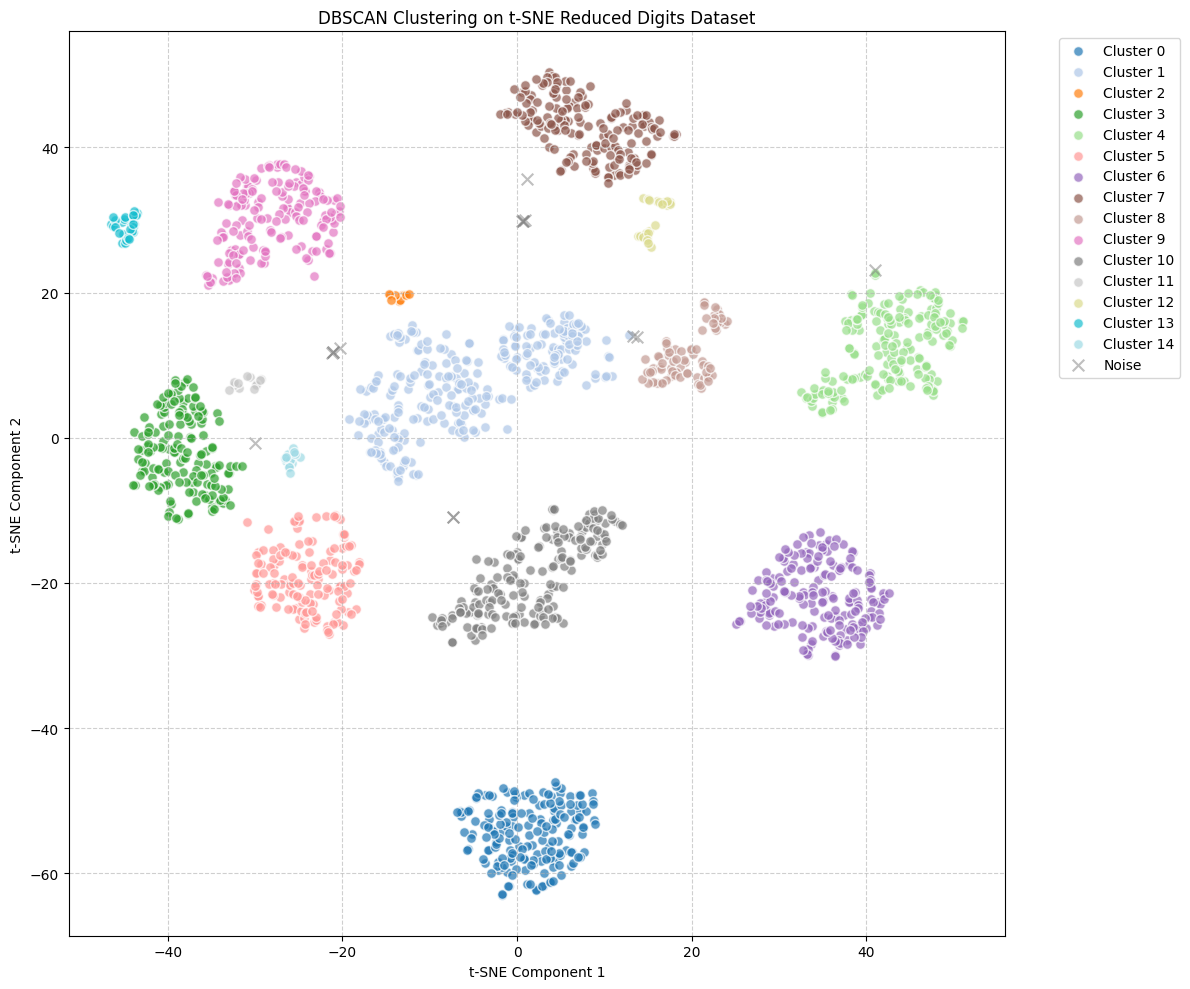

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get the unique labels, excluding noise (-1)
unique_labels = set(dbscan_labels)
if -1 in unique_labels:
    unique_labels.remove(-1)

# Number of clusters (excluding noise)
n_clusters = len(unique_labels)

# Create a color map for the clusters
# Use 'tab20' for distinct colors, up to 20 clusters. If more, cycle or choose another colormap.
colors = plt.cm.tab20(np.linspace(0, 1, n_clusters)) if n_clusters <= 20 else plt.cm.get_cmap('hsv', n_clusters)(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(12, 10))

# Plot regular clusters
for i, label in enumerate(unique_labels):
    mask = (dbscan_labels == label)
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                color=colors[i], label=f'Cluster {label}',
                s=50, alpha=0.7, edgecolors='w')

# Plot noise points
noise_mask = (dbscan_labels == -1)
if np.any(noise_mask):
    plt.scatter(X_tsne[noise_mask, 0], X_tsne[noise_mask, 1],
                color='gray', label='Noise', marker='x',
                s=70, alpha=0.5)

plt.title('DBSCAN Clustering on t-SNE Reduced Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent legend overlap
plt.show()

Generated data shape: (300, 2)


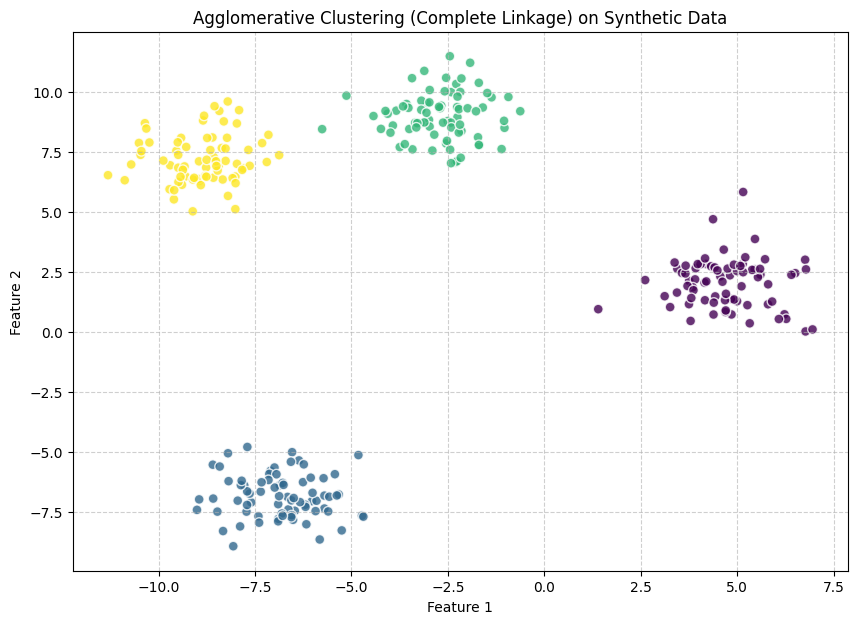

In [23]:
'''Q33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result '''

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 1. Generate synthetic data with 4 centers
n_samples = 300
n_features = 2
n_centers = 4
random_state = 42 # for reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, random_state=random_state)

print(f"Generated data shape: {X.shape}")

# 2. Apply Agglomerative Clustering with 'complete' linkage
# n_clusters is set to 4, matching the number of centers in make_blobs
agg_clustering = AgglomerativeClustering(n_clusters=n_centers, linkage='complete')
predicted_labels = agg_clustering.fit_predict(X)

# 3. Visualize the clustering result
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w')
plt.title('Agglomerative Clustering (Complete Linkage) on Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [24]:
'''Q34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot'''

from sklearn.datasets import load_breast_cancer

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()

# 2. Extract the feature data
X = breast_cancer.data

# 3. Extract the target labels
y = breast_cancer.target

# 4. Print the shape of X and y to verify the loaded data dimensions
print(f"Breast Cancer dataset features shape (X): {X.shape}")
print(f"Breast Cancer dataset target shape (y): {y.shape}")

Breast Cancer dataset features shape (X): (569, 30)
Breast Cancer dataset target shape (y): (569,)


In [25]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize the StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler to the features and transform the data
X_scaled = scaler.fit_transform(X)

# 3. Print the shape of the scaled data to verify
print(f"Shape of scaled features (X_scaled): {X_scaled.shape}")
print("First 5 rows of scaled features:\n", X_scaled[:5])

Shape of scaled features (X_scaled): (569, 30)
First 5 rows of scaled features:
 [[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444

In [26]:
from sklearn.cluster import KMeans

# 1. Initialize an empty list to store inertia values
inertia_values = []
k_values = range(2, 7) # k from 2 to 6 inclusive

# 2. Loop through values of k from 2 to 6
for k in k_values:
    # 3a. Initialize a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init to run k-means multiple times and pick the best result

    # 3b. Fit the KMeans model to the scaled dataset X_scaled
    kmeans.fit(X_scaled)

    # 3c. Append the calculated inertia to the list
    inertia_values.append(kmeans.inertia_)

# 4. Print the inertia_values list, along with the corresponding k values
print("Inertia values for different k values:")
for i, inertia in enumerate(inertia_values):
    print(f"k={k_values[i]}: {inertia:.2f}")

Inertia values for different k values:
k=2: 11595.53
k=3: 10061.80
k=4: 9258.99
k=5: 8558.66
k=6: 7970.26


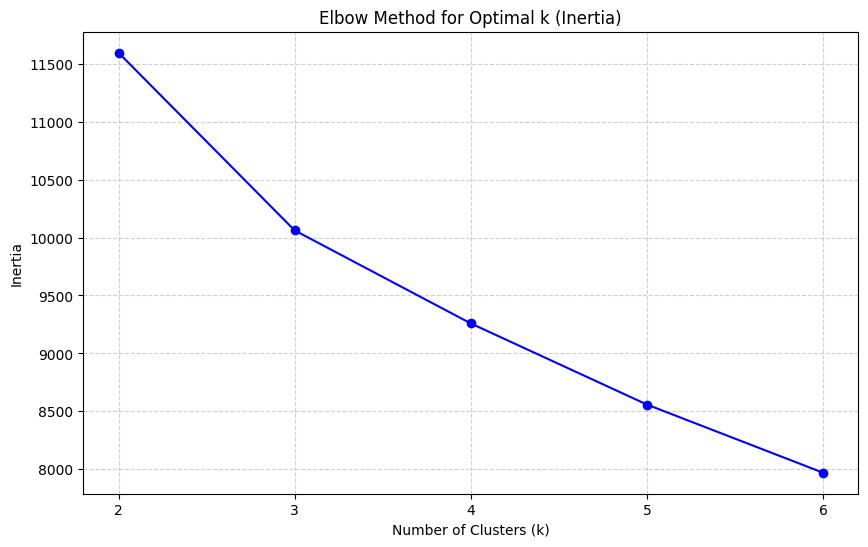

In [27]:
import matplotlib.pyplot as plt

# 1. Create a line plot for inertia values against k values
plt.figure(figsize=(10, 6))
plt.plot(list(k_values), inertia_values, marker='o', linestyle='-', color='blue')

# 2. Label the x-axis and y-axis
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# 3. Add a title to the plot
plt.title('Elbow Method for Optimal k (Inertia)')

# 4. Set x-axis ticks to show integer k values
plt.xticks(list(k_values))
plt.grid(True, linestyle='--', alpha=0.6)

# 5. Display the plot
plt.show()

Generated make_circles data shape: (300, 2)


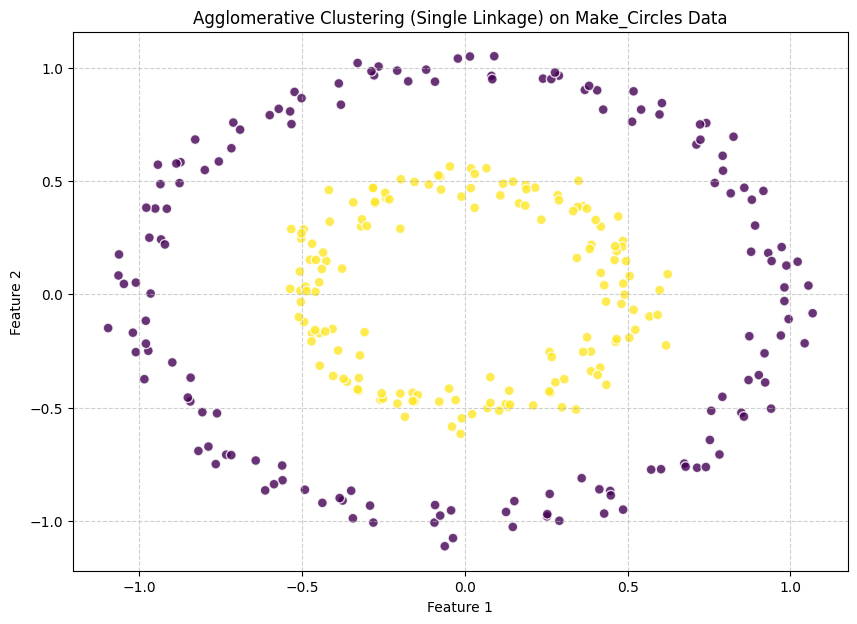

In [28]:
'''Q35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage '''

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 1. Generate synthetic concentric circles data
n_samples = 300
random_state = 42
X, y_true = make_circles(n_samples=n_samples, noise=0.05, factor=0.5, random_state=random_state)

print(f"Generated make_circles data shape: {X.shape}")

# 2. Apply Agglomerative Clustering with 'single' linkage
# n_clusters is set to 2, as make_circles typically generates 2 circles
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
predicted_labels = agg_clustering.fit_predict(X)

# 3. Visualize the clustering result
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w')
plt.title('Agglomerative Clustering (Single Linkage) on Make_Circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [29]:
'''Q36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise'''

from sklearn.datasets import load_wine

# 1. Load the Wine dataset
wine = load_wine()

# 2. Extract the feature data
X = wine.data

# 3. Extract the target labels
y = wine.target

# 4. Print the shape of X and y to verify the loaded data dimensions
print(f"Wine dataset features shape (X): {X.shape}")
print(f"Wine dataset target shape (y): {y.shape}")

Wine dataset features shape (X): (178, 13)
Wine dataset target shape (y): (178,)


In [30]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize the StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler to the features and transform the data
X_scaled = scaler.fit_transform(X)

# 3. Print the shape of the scaled data to verify
print(f"Shape of scaled features (X_scaled): {X_scaled.shape}")
print("First 5 rows of scaled features:\n", X_scaled[:5])

Shape of scaled features (X_scaled): (178, 13)
First 5 rows of scaled features:
 [[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


In [31]:
from sklearn.cluster import DBSCAN

# 1. Initialize a DBSCAN object with specified parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# 2. Fit the DBSCAN model to the scaled data and predict cluster labels
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3. Print the first few predicted labels and the number of unique clusters found
print(f"First 10 DBSCAN predicted labels: {dbscan_labels[:10]}")
print(f"Number of unique clusters found (including noise -1): {len(set(dbscan_labels))}")

First 10 DBSCAN predicted labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Number of unique clusters found (including noise -1): 1


In [32]:
from sklearn.cluster import DBSCAN

# 1. Initialize a DBSCAN object with adjusted parameters
# Increasing eps to 1.0 to allow for larger neighborhoods and cluster formation
dbscan = DBSCAN(eps=1.0, min_samples=5)

# 2. Fit the DBSCAN model to the scaled data and predict cluster labels
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3. Print the first few predicted labels and the number of unique clusters found
print(f"First 10 DBSCAN predicted labels: {dbscan_labels[:10]}")
print(f"Number of unique clusters found (including noise -1): {len(set(dbscan_labels))}")

First 10 DBSCAN predicted labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Number of unique clusters found (including noise -1): 1


In [33]:
from sklearn.cluster import DBSCAN

# 1. Initialize a DBSCAN object with adjusted parameters
# Increasing eps to 2.0 to allow for larger neighborhoods and cluster formation
dbscan = DBSCAN(eps=2.0, min_samples=5)

# 2. Fit the DBSCAN model to the scaled data and predict cluster labels
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3. Print the first few predicted labels and the number of unique clusters found
print(f"First 10 DBSCAN predicted labels: {dbscan_labels[:10]}")
print(f"Number of unique clusters found (including noise -1): {len(set(dbscan_labels))}")

First 10 DBSCAN predicted labels: [ 0  0  0  0 -1  0  0  0  0  0]
Number of unique clusters found (including noise -1): 6


In [34]:
import numpy as np

# 1. Get the set of unique labels from dbscan_labels
unique_labels = set(dbscan_labels)

# 2. Exclude the noise label (-1) to count the actual number of clusters
if -1 in unique_labels:
    n_clusters = len(unique_labels) - 1
    # 3. Count the number of noise points (samples with label -1)
    n_noise = list(dbscan_labels).count(-1)
else:
    n_clusters = len(unique_labels)
    n_noise = 0

# 4. Print the total number of distinct clusters found (excluding noise)
print(f"Estimated number of clusters: {n_clusters}")

# 5. Print the total number of noise points found
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 5
Estimated number of noise points: 85


Generated data shape: (300, 2)


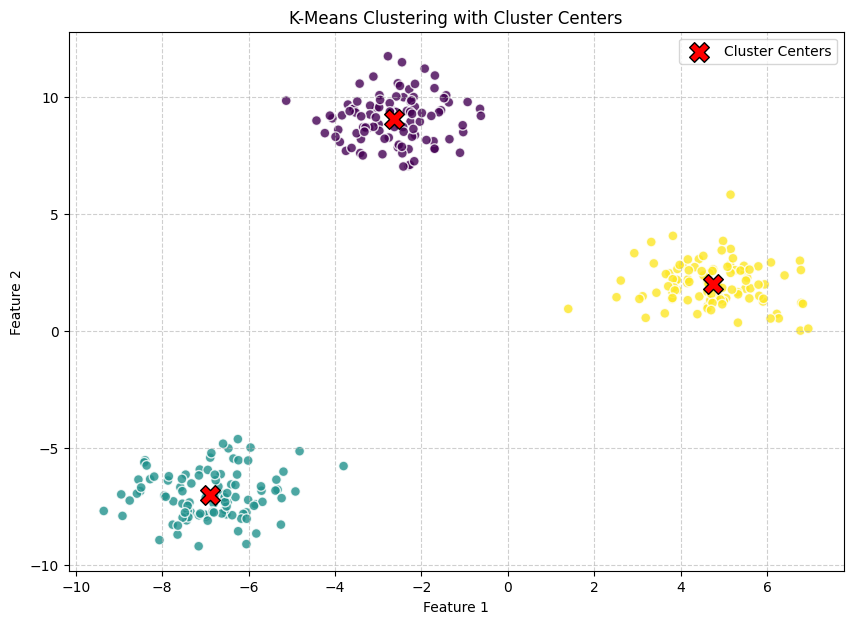

In [35]:
'''Q37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points '''

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Generate synthetic data
n_samples = 300
n_features = 2
n_centers = 3 # Let's assume 3 centers for this example
random_state = 42 # for reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, random_state=random_state)

print(f"Generated data shape: {X.shape}")

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init=10)
kmeans.fit(X)
predicted_labels = kmeans.predict(X)
cluster_centers = kmeans.cluster_centers_

# 3. Plot data points and cluster centers
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers', edgecolors='k')
plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [36]:
'''Q38 Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise'''

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target # True labels (for reference)

print(f"Iris dataset shape: {X.shape}")

# 2. Apply Feature Scaling (StandardScaler) - important for distance-based algorithms like DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled using StandardScaler.")

# 3. Apply DBSCAN clustering
# Parameters (eps, min_samples) are crucial and often need tuning.
# For Iris, let's start with values that often yield reasonable results after scaling.
dbsc = DBSCAN(eps=0.5, min_samples=5) # These parameters might need adjustment based on data characteristics
dbsc.fit(X_scaled)

# Get cluster labels. Noise points are labeled as -1.
labels = dbsc.labels_

# 4. Count and print the number of samples identified as noise
n_noise_points = list(labels).count(-1)

print(f"\nTotal samples: {X.shape[0]}")
print(f"Samples identified as noise by DBSCAN: {n_noise_points}")

# Optionally, also print the number of clusters found (excluding noise)
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f"Number of clusters found: {n_clusters}")

Iris dataset shape: (150, 4)
Features scaled using StandardScaler.

Total samples: 150
Samples identified as noise by DBSCAN: 34
Number of clusters found: 2


Generated make_moons data shape: (300, 2)


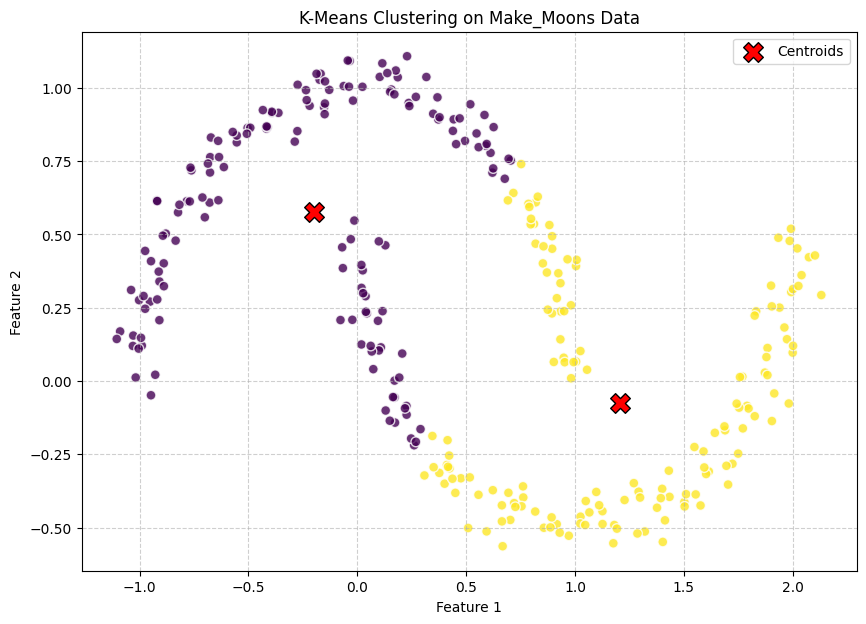

In [37]:
'''Q39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result'''

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Generate synthetic non-linearly separable data using make_moons
n_samples = 300
noise = 0.05 # Add a small amount of noise for realism
random_state = 42 # for reproducibility

X, y_true = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)

print(f"Generated make_moons data shape: {X.shape}")

# 2. Apply K-Means clustering (assuming 2 clusters as per make_moons structure)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
kmeans.fit(X)
predicted_labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# 3. Visualize the clustering result
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids', edgecolors='k')
plt.title('K-Means Clustering on Make_Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [38]:
'''Q40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot'''

from sklearn.datasets import load_digits

# 1. Load the Digits dataset
digits = load_digits()

# 2. Extract the feature data (images)
X = digits.data

# 3. Extract the target labels (actual digits)
y = digits.target

# 4. Print the shape of X and y to verify the loaded data dimensions
print(f"Digits dataset features shape (X): {X.shape}")
print(f"Digits dataset target shape (y): {y.shape}")

Digits dataset features shape (X): (1797, 64)
Digits dataset target shape (y): (1797,)


In [39]:
from sklearn.decomposition import PCA

# 1. Initialize PCA with 3 components and a random state for reproducibility
pca = PCA(n_components=3, random_state=42)

# 2. Apply PCA to the Digits dataset features (X)
X_pca = pca.fit_transform(X)

# 3. Print the shape of X_pca to verify the dimensionality reduction
print(f"Shape of X after PCA dimensionality reduction: {X_pca.shape}")

Shape of X after PCA dimensionality reduction: (1797, 3)


In [40]:
from sklearn.cluster import KMeans

# 1. Initialize a KMeans model with n_clusters=10, random_state=42, and n_init=10
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)

# 2. Fit the KMeans model to the X_pca data
kmeans.fit(X_pca)

# 3. Store the predicted cluster labels
kmeans_labels = kmeans.predict(X_pca)

# 4. Store the cluster centers (centroids)
kmeans_centroids = kmeans.cluster_centers_

print("K-Means clustering applied successfully to PCA-reduced data.")
print(f"First 10 predicted cluster labels: {kmeans_labels[:10]}")
print(f"Shape of cluster centroids: {kmeans_centroids.shape}")

K-Means clustering applied successfully to PCA-reduced data.
First 10 predicted cluster labels: [4 7 7 2 1 0 5 9 6 0]
Shape of cluster centroids: (10, 3)


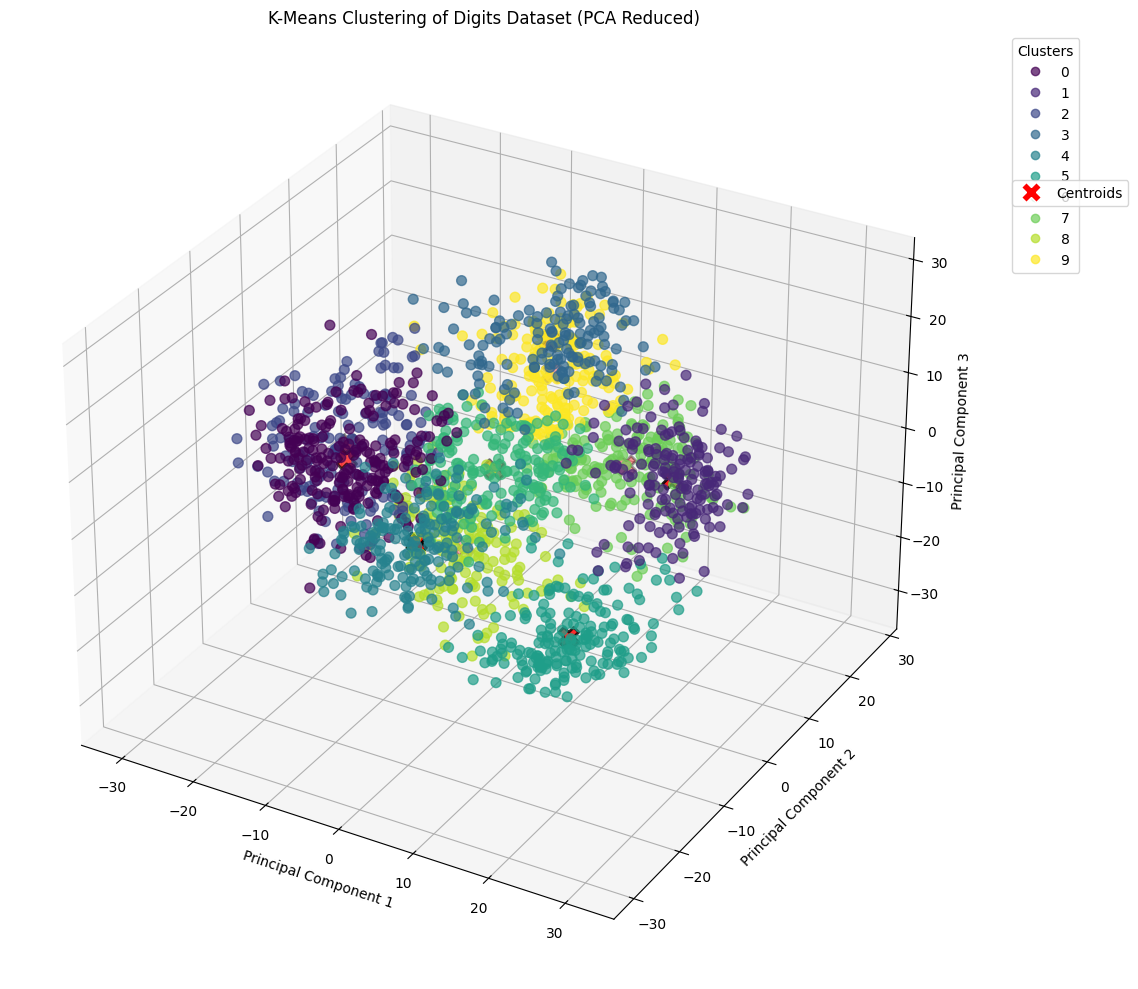

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Create a new figure and a 3D axes object
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 2. Create a 3D scatter plot of X_pca, colored by kmeans_labels
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=kmeans_labels, cmap='viridis', s=50, alpha=0.7,
                     label='Data points by Cluster')

# 3. Add a 3D scatter plot of the kmeans_centroids
ax.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], kmeans_centroids[:, 2],
           c='red', marker='X', s=200, label='Centroids', edgecolors='k', linewidth=2)

# 4. Set the title of the plot
ax.set_title('K-Means Clustering of Digits Dataset (PCA Reduced)')

# 5. Label the x, y, and z axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Create a legend for the clusters
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters', loc='upper left', bbox_to_anchor=(1.05, 1))
ax.add_artist(legend1)

# Add a separate legend for the centroids
ax.legend(handles=[plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='red', markersize=15, label='Centroids')], loc='upper left', bbox_to_anchor=(1.05, 0.85))

# Adjust layout to prevent legends from overlapping with the plot
plt.tight_layout()

# 6. Display the plot
plt.show()

In [43]:
'''Q41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering'''

from sklearn.datasets import make_blobs

# 1. Generate a synthetic dataset with 5 distinct centers
X, _ = make_blobs(n_samples=300, n_features=2, centers=5, random_state=42)

# 2. Print the shape of the generated dataset X to verify its dimensions
print(f"Generated data shape: {X.shape}")

Generated data shape: (300, 2)


In [44]:
from sklearn.cluster import KMeans

# 2. Initialize a KMeans model with 5 clusters, a fixed random state, and n_init=10
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# 3. Fit the KMeans model to the synthetic dataset X
kmeans.fit(X)

# 4. Predict the cluster labels for the data points in X
predicted_labels = kmeans.predict(X)

# 5. Extract the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

print("K-Means clustering applied successfully.")
print(f"First 10 predicted cluster labels: {predicted_labels[:10]}")
print(f"Shape of cluster centroids: {cluster_centers.shape}")

K-Means clustering applied successfully.
First 10 predicted cluster labels: [4 0 4 3 4 2 0 1 2 0]
Shape of cluster centroids: (5, 2)


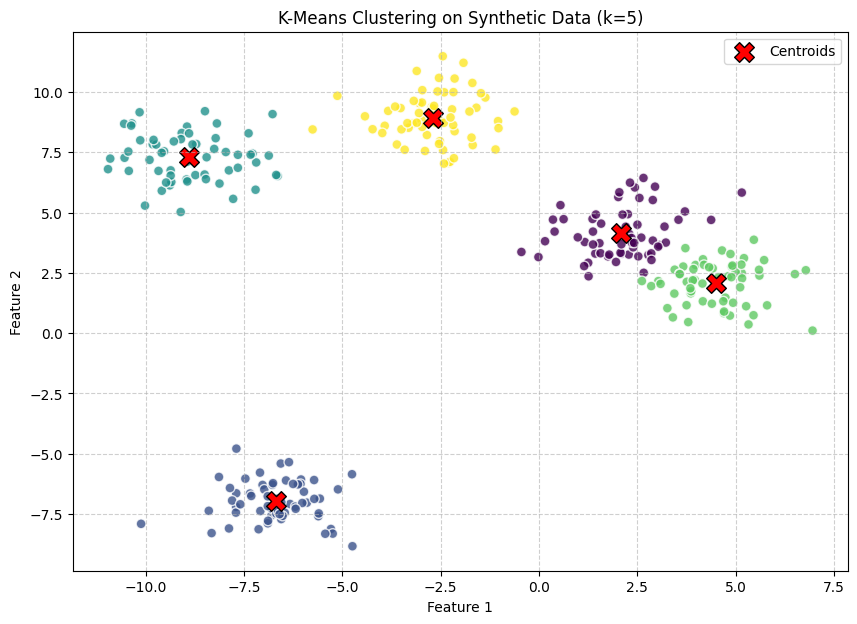

In [45]:
import matplotlib.pyplot as plt

# 1. Create a scatter plot of the synthetic data X, colored by predicted_labels
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w')

# 2. Overlay the cluster centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids', edgecolors='k')

# 3. Add title and labels
plt.title('K-Means Clustering on Synthetic Data (k=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 4. Display the plot
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

# 1. Calculate the Silhouette Score
silhouette = silhouette_score(X, predicted_labels)

# 2. Print the calculated Silhouette Score, formatted to four decimal places
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.6586


In [47]:
'''Q42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D'''

from sklearn.datasets import load_breast_cancer

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()

# 2. Extract the feature data
X = breast_cancer.data

# 3. Extract the target labels
y = breast_cancer.target

# 4. Print the shape of X and y to verify the loaded data dimensions
print(f"Breast Cancer dataset features shape (X): {X.shape}")
print(f"Breast Cancer dataset target shape (y): {y.shape}")

Breast Cancer dataset features shape (X): (569, 30)
Breast Cancer dataset target shape (y): (569,)


In [48]:
from sklearn.decomposition import PCA

# 1. Initialize PCA with 2 components and a random state for reproducibility
pca = PCA(n_components=2, random_state=42)

# 2. Apply PCA to the Breast Cancer dataset features (X)
X_pca = pca.fit_transform(X)

# 3. Print the shape of X_pca to verify the dimensionality reduction
print(f"Shape of X after PCA dimensionality reduction: {X_pca.shape}")

Shape of X after PCA dimensionality reduction: (569, 2)


In [49]:
from sklearn.cluster import AgglomerativeClustering

# 1. Initialize an AgglomerativeClustering object with n_clusters=2
agg_clustering = AgglomerativeClustering(n_clusters=2)

# 2. Fit the agglomerative clustering model to the X_pca data and predict the cluster labels
agg_labels = agg_clustering.fit_predict(X_pca)

# 3. Print the first few predicted labels to verify the clustering
print(f"First 10 Agglomerative Clustering labels: {agg_labels[:10]}")

First 10 Agglomerative Clustering labels: [1 1 1 0 1 0 1 0 0 0]


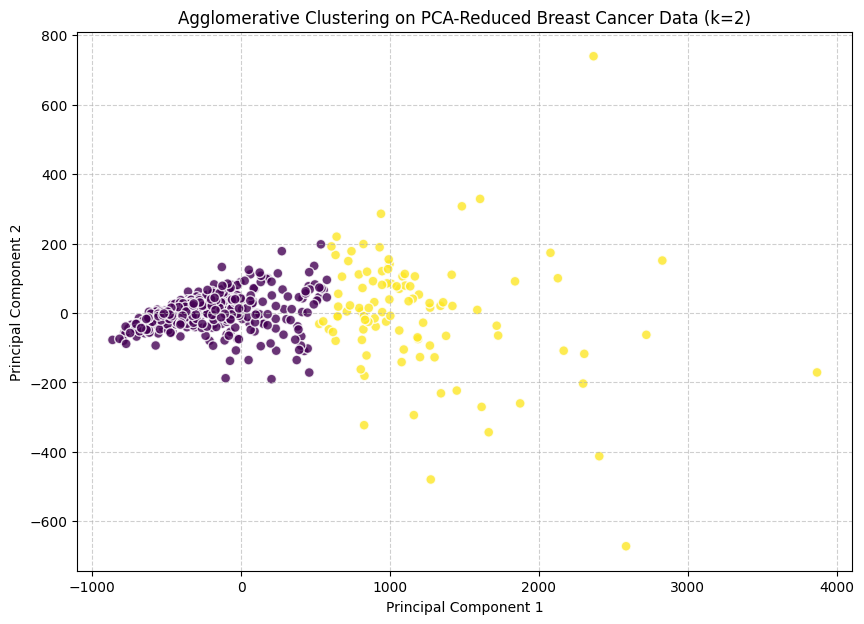

In [50]:
import matplotlib.pyplot as plt

# 1. Create a scatter plot of the PCA-reduced data, colored by agg_labels
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w')

# 2. Add title and labels
plt.title('Agglomerative Clustering on PCA-Reduced Breast Cancer Data (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)

# 3. Display the plot
plt.show()

In [51]:
'''Q43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side'''

from sklearn.datasets import make_circles

# 1. Generate synthetic circular data with added noise
X, y = make_circles(n_samples=300, noise=0.05, random_state=42)

# 2. Print the shape of the generated dataset X to verify its dimensions
print(f"Generated circular data shape: {X.shape}")

Generated circular data shape: (300, 2)


In [52]:
from sklearn.cluster import KMeans

# 1. Initialize a KMeans model with 2 clusters, a fixed random state, and n_init=10
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

# 2. Fit the KMeans model to the synthetic dataset X
kmeans.fit(X)

# 3. Predict the cluster labels for the data points in X
kmeans_labels = kmeans.predict(X)

# 4. Extract the cluster centers (centroids)
kmeans_centroids = kmeans.cluster_centers_

print("K-Means clustering applied successfully.")
print(f"First 10 predicted cluster labels: {kmeans_labels[:10]}")
print(f"Shape of cluster centroids: {kmeans_centroids.shape}")

K-Means clustering applied successfully.
First 10 predicted cluster labels: [1 0 0 0 1 1 1 0 0 1]
Shape of cluster centroids: (2, 2)


In [53]:
from sklearn.cluster import DBSCAN

# 1. Initialize a DBSCAN object with specified parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)

# 2. Fit the DBSCAN model to the synthetic dataset X and predict cluster labels
dbscan_labels = dbscan.fit_predict(X)

# 3. Print the first few predicted labels and the number of unique clusters found
print(f"First 10 DBSCAN predicted labels: {dbscan_labels[:10]}")
print(f"Number of unique clusters found (including noise -1): {len(set(dbscan_labels))}")

First 10 DBSCAN predicted labels: [0 0 0 0 0 0 0 0 0 0]
Number of unique clusters found (including noise -1): 1


In [54]:
from sklearn.cluster import DBSCAN

# 1. Initialize a DBSCAN object with adjusted parameters
# Decreasing eps to 0.1 to better separate the two circular clusters
dbscan = DBSCAN(eps=0.1, min_samples=5)

# 2. Fit the DBSCAN model to the synthetic dataset X and predict cluster labels
dbscan_labels = dbscan.fit_predict(X)

# 3. Print the first few predicted labels and the number of unique clusters found
print(f"First 10 DBSCAN predicted labels: {dbscan_labels[:10]}")
print(f"Number of unique clusters found (including noise -1): {len(set(dbscan_labels))}")

First 10 DBSCAN predicted labels: [0 1 5 5 2 3 0 4 5 5]
Number of unique clusters found (including noise -1): 22


/tmp/ipython-input-4029133452.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.tab20(np.linspace(0, 1, n_clusters_dbscan)) if n_clusters_dbscan <= 20 else plt.cm.get_cmap('hsv', n_clusters_dbscan)(np.linspace(0, 1, n_clusters_dbscan))


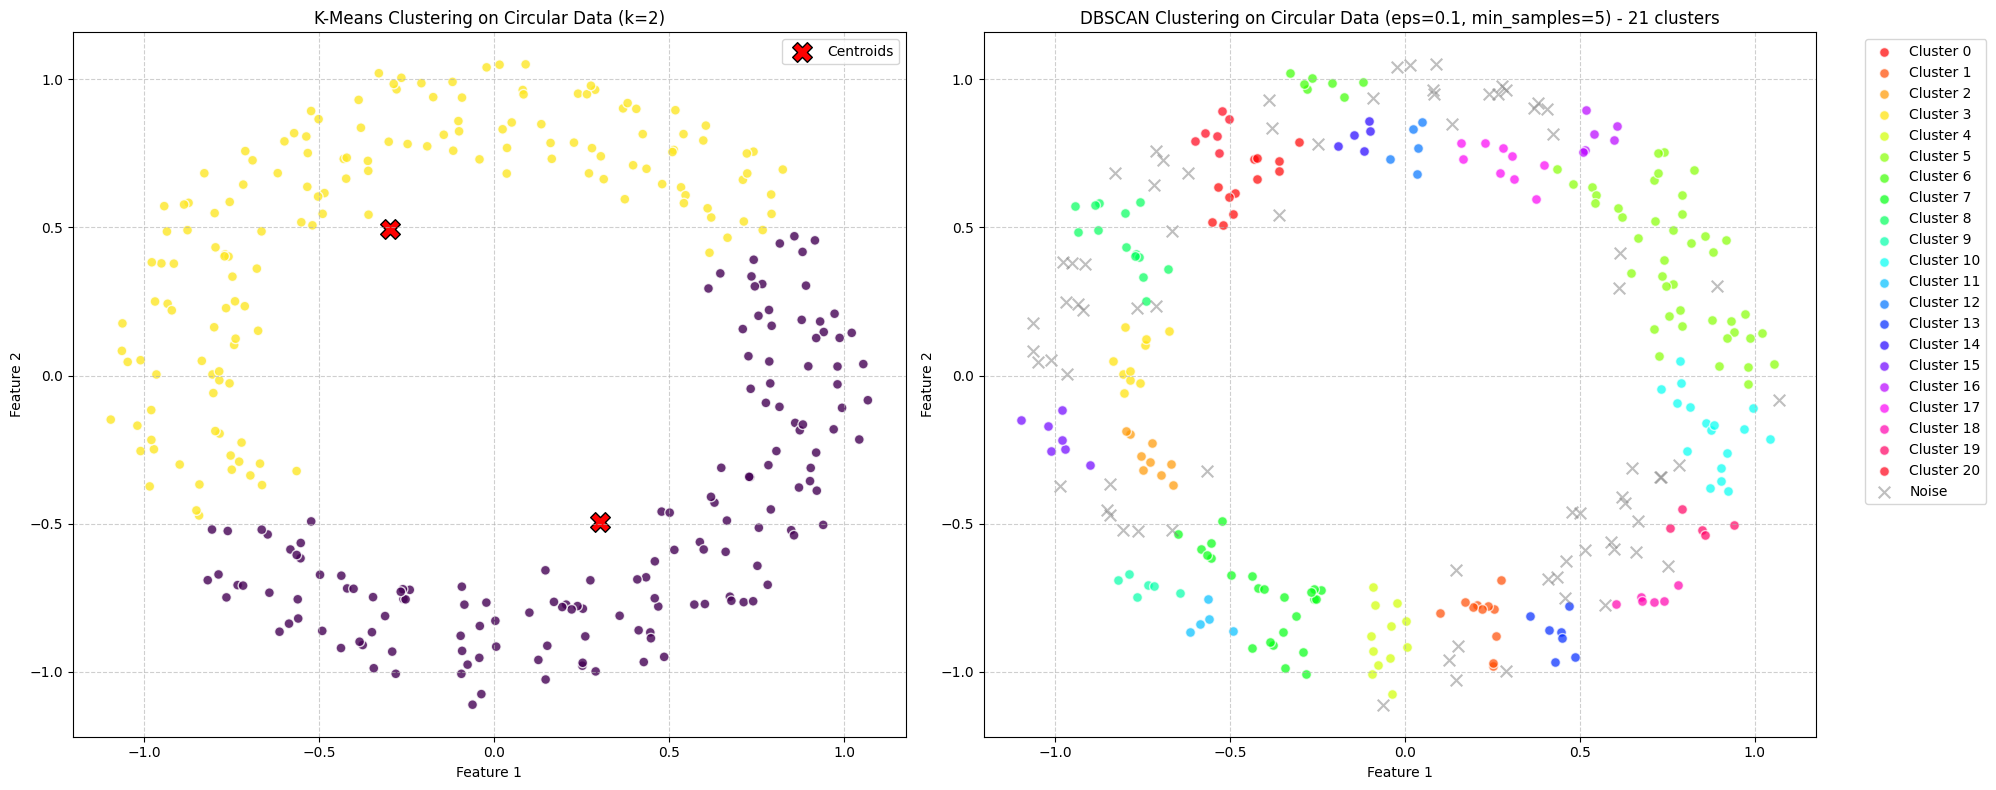

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- K-Means Clustering Plot ----
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w')
axes[0].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=200, label='Centroids', edgecolors='k')
axes[0].set_title('K-Means Clustering on Circular Data (k=2)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- DBSCAN Clustering Plot ---
unique_labels = set(dbscan_labels)
if -1 in unique_labels:
    unique_labels.remove(-1)

n_clusters_dbscan = len(unique_labels)
colors = plt.cm.tab20(np.linspace(0, 1, n_clusters_dbscan)) if n_clusters_dbscan <= 20 else plt.cm.get_cmap('hsv', n_clusters_dbscan)(np.linspace(0, 1, n_clusters_dbscan))

for i, label in enumerate(unique_labels):
    mask = (dbscan_labels == label)
    axes[1].scatter(X[mask, 0], X[mask, 1],
                    color=colors[i], label=f'Cluster {label}',
                    s=50, alpha=0.7, edgecolors='w')

noise_mask = (dbscan_labels == -1)
if np.any(noise_mask):
    axes[1].scatter(X[noise_mask, 0], X[noise_mask, 1],
                    color='gray', label='Noise', marker='x',
                    s=70, alpha=0.5)

axes[1].set_title(f'DBSCAN Clustering on Circular Data (eps=0.1, min_samples=5) - {n_clusters_dbscan} clusters')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

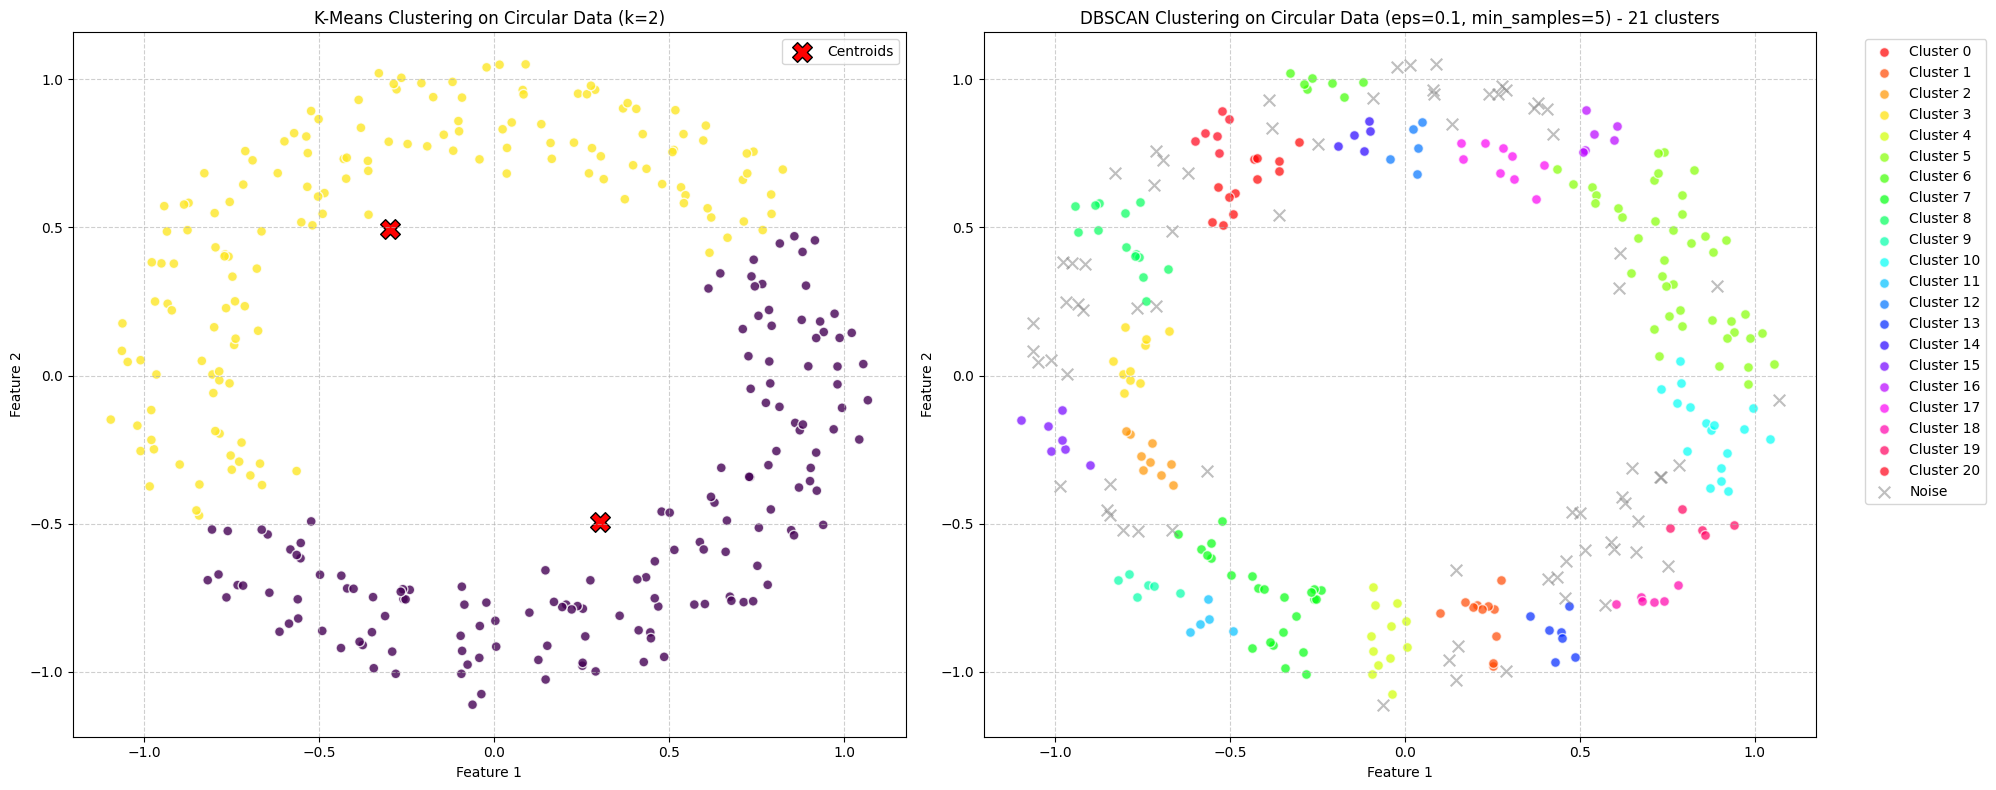

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- K-Means Clustering Plot ----
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w')
axes[0].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=200, label='Centroids', edgecolors='k')
axes[0].set_title('K-Means Clustering on Circular Data (k=2)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- DBSCAN Clustering Plot ---
unique_labels = set(dbscan_labels)
if -1 in unique_labels:
    unique_labels.remove(-1)

n_clusters_dbscan = len(unique_labels)
colors = plt.cm.tab20(np.linspace(0, 1, n_clusters_dbscan)) if n_clusters_dbscan <= 20 else plt.colormaps.get_cmap('hsv')(np.linspace(0, 1, n_clusters_dbscan))

for i, label in enumerate(unique_labels):
    mask = (dbscan_labels == label)
    axes[1].scatter(X[mask, 0], X[mask, 1],
                    color=colors[i], label=f'Cluster {label}',
                    s=50, alpha=0.7, edgecolors='w')

noise_mask = (dbscan_labels == -1)
if np.any(noise_mask):
    axes[1].scatter(X[noise_mask, 0], X[noise_mask, 1],
                    color='gray', label='Noise', marker='x',
                    s=70, alpha=0.5)

axes[1].set_title(f'DBSCAN Clustering on Circular Data (eps=0.1, min_samples=5) - {n_clusters_dbscan} clusters')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

In [57]:
'''Q44.  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering'''

from sklearn.datasets import load_iris

iris_data = load_iris()
print("Iris dataset loaded successfully.")

Iris dataset loaded successfully.


In [58]:
X = iris_data.data

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10) # Added n_init=10 as recommended in newer scikit-learn versions
kmeans.fit(X)
kmeans_labels = kmeans.labels_

print("KMeans clustering applied and labels generated.")
print(f"First 10 cluster labels: {kmeans_labels[:10]}")

KMeans clustering applied and labels generated.
First 10 cluster labels: [1 1 1 1 1 1 1 1 1 1]


In [59]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans_labels)

print(f"Average Silhouette Coefficient: {silhouette_avg:.3f}")

Average Silhouette Coefficient: 0.553


In [60]:
from sklearn.metrics import silhouette_samples

sample_silhouette_values = silhouette_samples(X, kmeans_labels)

print("Silhouette coefficients for each sample calculated.")
print(f"First 10 sample silhouette values: {sample_silhouette_values[:10].round(3)}")

Silhouette coefficients for each sample calculated.
First 10 sample silhouette values: [0.853 0.815 0.829 0.805 0.849 0.748 0.822 0.854 0.752 0.825]


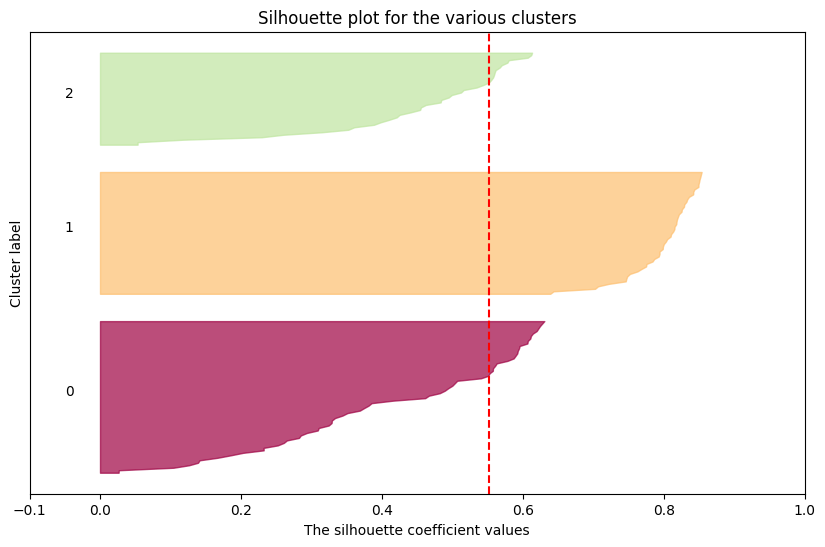

Silhouette plot generated successfully.


In [61]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(3): # Assuming 3 clusters for Iris dataset
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.Spectral(float(i) / 3) # Use different colors for different clusters
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()
print("Silhouette plot generated successfully.")

In [62]:
'''Q45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters'''

from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.6, random_state=42)

print("Synthetic 2D data generated successfully.")
print(f"Shape of data (X): {X.shape}")
print(f"Shape of true labels (y_true): {y_true.shape}")

Synthetic 2D data generated successfully.
Shape of data (X): (300, 2)
Shape of true labels (y_true): (300,)


In [63]:
from sklearn.cluster import AgglomerativeClustering

# Initialize AgglomerativeClustering with 3 clusters and 'average' linkage
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

# Fit the model to the synthetic data
agg_labels = agg_clustering.fit_predict(X)

print("Agglomerative Clustering applied and labels generated.")
print(f"First 10 cluster labels: {agg_labels[:10]}")

Agglomerative Clustering applied and labels generated.
First 10 cluster labels: [1 1 2 0 1 0 2 0 2 2]


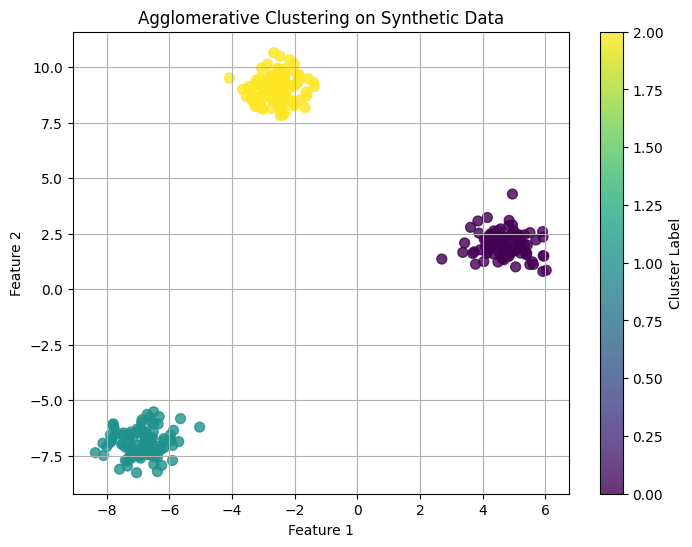

Scatter plot of Agglomerative Clustering results generated successfully.


In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Agglomerative Clustering on Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

print("Scatter plot of Agglomerative Clustering results generated successfully.")

In [65]:
'''Q46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features)'''

from sklearn.datasets import load_wine

wine_data = load_wine()
print("Wine dataset loaded successfully.")

Wine dataset loaded successfully.


In [66]:
X_wine = wine_data.data

from sklearn.cluster import KMeans

kmeans_wine = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10)
kmeans_wine.fit(X_wine)
kmeans_wine_labels = kmeans_wine.labels_

print("KMeans clustering applied to Wine dataset and labels generated.")
print(f"First 10 cluster labels for Wine dataset: {kmeans_wine_labels[:10]}")

KMeans clustering applied to Wine dataset and labels generated.
First 10 cluster labels for Wine dataset: [1 1 1 1 0 1 1 1 1 1]


In [67]:
import pandas as pd

df_wine_clusters = pd.DataFrame(X_wine[:, :4], columns=[f'feature_{i}' for i in range(4)])
df_wine_clusters['Cluster'] = kmeans_wine_labels

print("DataFrame 'df_wine_clusters' created successfully with features and cluster labels.")
print(df_wine_clusters.head())

DataFrame 'df_wine_clusters' created successfully with features and cluster labels.
   feature_0  feature_1  feature_2  feature_3  Cluster
0      14.23       1.71       2.43       15.6        1
1      13.20       1.78       2.14       11.2        1
2      13.16       2.36       2.67       18.6        1
3      14.37       1.95       2.50       16.8        1
4      13.24       2.59       2.87       21.0        0


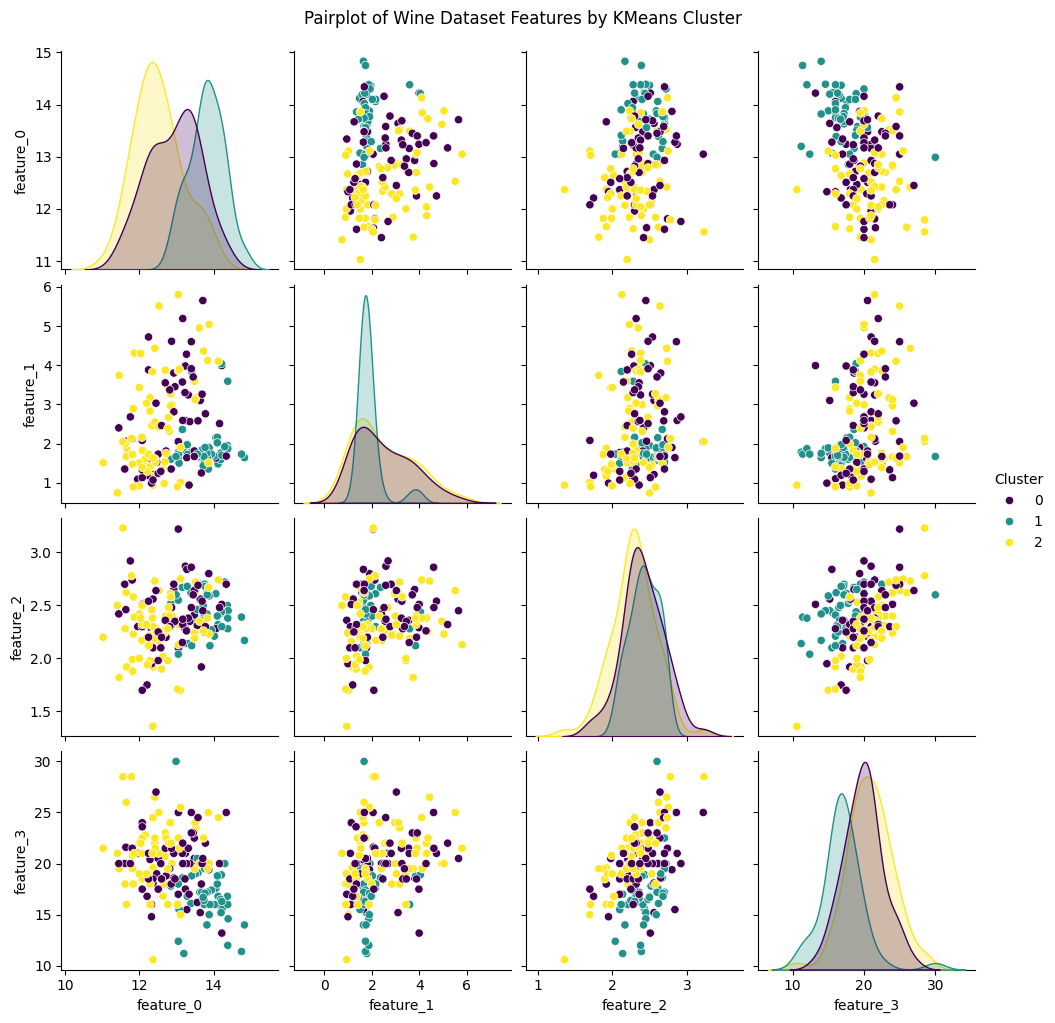

Seaborn pairplot generated successfully.


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_wine_clusters, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Wine Dataset Features by KMeans Cluster', y=1.02)
plt.show()

print("Seaborn pairplot generated successfully.")

In [69]:
'''Q47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count'''

from sklearn.datasets import make_blobs

X_noisy, y_true_noisy = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0, random_state=42)

print("Synthetic 2D noisy data generated successfully.")
print(f"Shape of data (X_noisy): {X_noisy.shape}")
print(f"Shape of true labels (y_true_noisy): {y_true_noisy.shape}")

Synthetic 2D noisy data generated successfully.
Shape of data (X_noisy): (500, 2)
Shape of true labels (y_true_noisy): (500,)


In [70]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_noisy)

print("DBSCAN clustering applied and labels generated.")
print(f"First 10 DBSCAN labels: {dbscan_labels[:10]}")

DBSCAN clustering applied and labels generated.
First 10 DBSCAN labels: [ 0 -1 -1  3  1  1 -1  1  2  1]


In [71]:
import numpy as np

# Find all unique labels, ignoring noise if present
unique_labels = np.unique(dbscan_labels)

# Number of noise points (label -1)
noise_points_count = np.sum(dbscan_labels == -1)

# Number of clusters (excluding noise label -1)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print(f"Estimated number of clusters: {num_clusters}")
print(f"Number of noise points: {noise_points_count}")

Estimated number of clusters: 6
Number of noise points: 67


In [72]:
'''Q48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters'''

from sklearn.datasets import load_digits

digits_data = load_digits()
print("Digits dataset loaded successfully.")

Digits dataset loaded successfully.


In [73]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
digits_tsne = tsne.fit_transform(digits_data.data)

print("Digits dataset dimensionality reduced to 2D using t-SNE.")
print(f"Shape of t-SNE transformed data: {digits_tsne.shape}")

Digits dataset dimensionality reduced to 2D using t-SNE.
Shape of t-SNE transformed data: (1797, 2)


In [74]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering_digits = AgglomerativeClustering(n_clusters=10, linkage='ward')
agg_labels_digits = agg_clustering_digits.fit_predict(digits_tsne)

print("Agglomerative Clustering applied to t-SNE reduced Digits data and labels generated.")
print(f"First 10 cluster labels for Digits dataset: {agg_labels_digits[:10]}")

Agglomerative Clustering applied to t-SNE reduced Digits data and labels generated.
First 10 cluster labels for Digits dataset: [7 0 3 8 4 9 6 5 3 9]


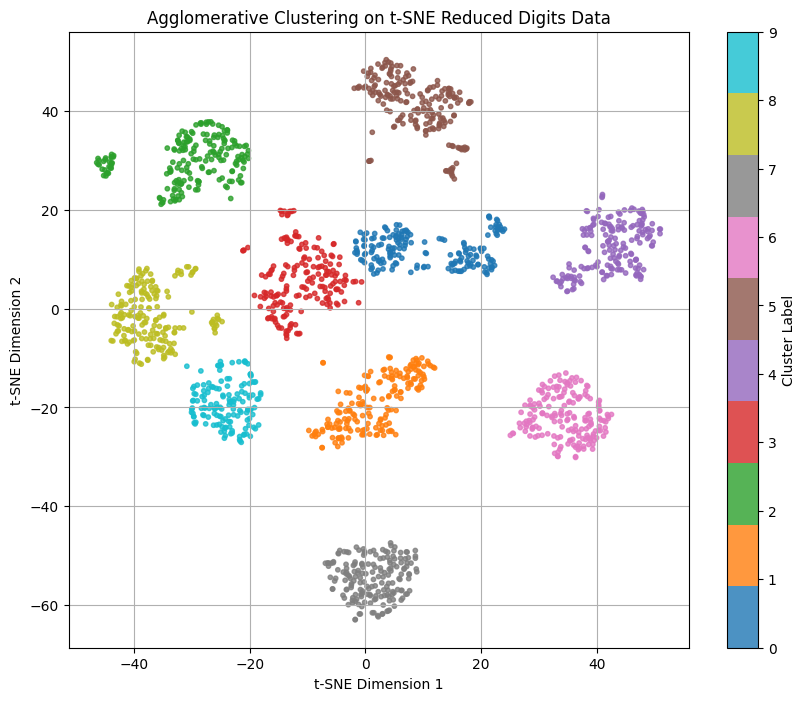

Scatter plot of Agglomerative Clustering on t-SNE reduced Digits data generated successfully.


In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1], c=agg_labels_digits, cmap='tab10', s=10, alpha=0.8)
plt.title('Agglomerative Clustering on t-SNE Reduced Digits Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

print("Scatter plot of Agglomerative Clustering on t-SNE reduced Digits data generated successfully.")